
# Introductory Data Science for Innovation
## Workshop 5
## Working with publication data
## By David Eggleton


#---------------------------
# Aim of the seminar
#---------------------------
# The seminar aims at working with Web of Science data and explore the library bibliometrix
# The data used today is collected using various quantum technology terms looking at topics, keeping only
# articles and book chapters (excluding reviews, conference proceedings etc.) looking at
# years from 2013 to 2016. I just picked the top 1000 most cited articles to keep things simple (and interesting!)
# The data was exported in a plain text file
#---------------------------

############################
##  Bibliometrix Package  ##
############################

In [1]:
install.packages("bibliometrix") #if necessary

NameError: name 'install' is not defined

In [ ]:
library(bibliometrix)
library(tidyverse)

Please note that our software is open source and available for use, distributed under the MIT license.
When it is used in a publication, we ask that authors properly cite the following reference:

Aria, M. & Cuccurullo, C. (2017) bibliometrix: An R-tool for comprehensive science mapping analysis, 
                        Journal of Informetrics, 11(4), pp 959-975, Elsevier.

Failure to properly cite the software is considered a violation of the license.
                        
For information and bug reports:
                        - Take a look at https://www.bibliometrix.org
                        - Send an email to info@bibliometrix.org   
                        - Write a post on https://github.com/massimoaria/bibliometrix/issues
                        
Help us to keep Bibliometrix and Biblioshiny free to download and use by contributing with a small donation to support our research team (https://bibliometrix.org/donate.html)

                        
To start with the Bibliosh

# 1. Load the dataset
#------------------------------------------------------

# Instructions #
Load the dataset from the url and convert to a dataframe

In [ ]:
url = "https://raw.githubusercontent.com/QEDditch/995N1-2023/main/data/qtData.txt"
isi_original_file <- url
isi_file <- convert2df(isi_original_file, dbsource="wos", format="plaintext")    # Convert the directory of the dataset, use either the manual above or the help function (e.g. ?convert2df) to find the possible

# Inspect the isi_file to see the variables and number of observations


Converting your wos collection into a bibliographic dataframe

Done!


Generating affiliation field tag AU_UN from C1:  Done!



# 2. Descriptive bibliometrics analysis
#------------------------------------------------------




MAIN INFORMATION ABOUT DATA

 Timespan                              2014 : 2020 
 Sources (Journals, Books, etc)        16 
 Documents                             50 
 Annual Growth Rate %                  -32.94 
 Document Average Age                  6.78 
 Average citations per doc             967.8 
 Average citations per year per doc    133.8 
 References                            3819 
 
DOCUMENT TYPES                     
 article      50 
 
DOCUMENT CONTENTS
 Keywords Plus (ID)                    188 
 Author's Keywords (DE)                27 
 
AUTHORS
 Authors                               426 
 Author Appearances                    526 
 Authors of single-authored docs       3 
 
AUTHORS COLLABORATION
 Single-authored docs                  3 
 Documents per Author                  0.117 
 Co-Authors per Doc                    10.5 
 International co-authorships %        52 
 

Annual Scientific Production

 Year    Articles
    2014       11
    2015        8
    2016    

Warning message:
“Removed 14 rows containing missing values (`position_stack()`).”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: ignored

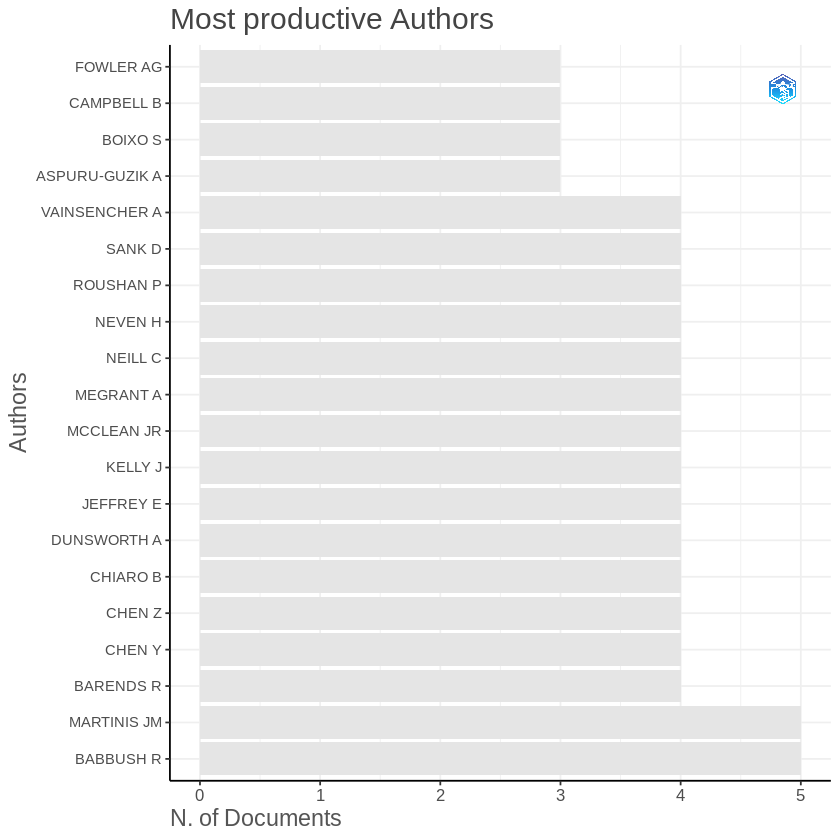

In [ ]:
isi_results <- biblioAnalysis(isi_file, sep=";")      # Do the bibliometric analysis on the converted file, using ';' as a separator
isi_summary <- summary(object=isi_results, k=20, pause=FALSE)   # use summary on the results file for the first 20 (using k=20) of each type of analysis

## Inspect the information printed in the console ##
# Can you check how many documents we have for each year?
# Year    Articles
# 2013       16
# 2014       31
# 2015      126
# 2016      302
# How many authors are in the publications overall? 1524
# Who was involved in the most articles? Why is this different for the Articles Fractionalized?
# What are the top 3 cited articles?
# What position is the UK in terms of of volume of articles it hosts a corresponding author from. UK

# Plots
plot(x = isi_results, k = 20, pause = FALSE)      # Use isi_results to create plots using the top 20 elements again

## Inspect the information in the different plots - using the previous arrow ##
# Which year get's the most citations? 2014
# Is that the year which has most publications? No 2016
# Which country does not seem to collaborate much with others? Japan, Spain, Greece

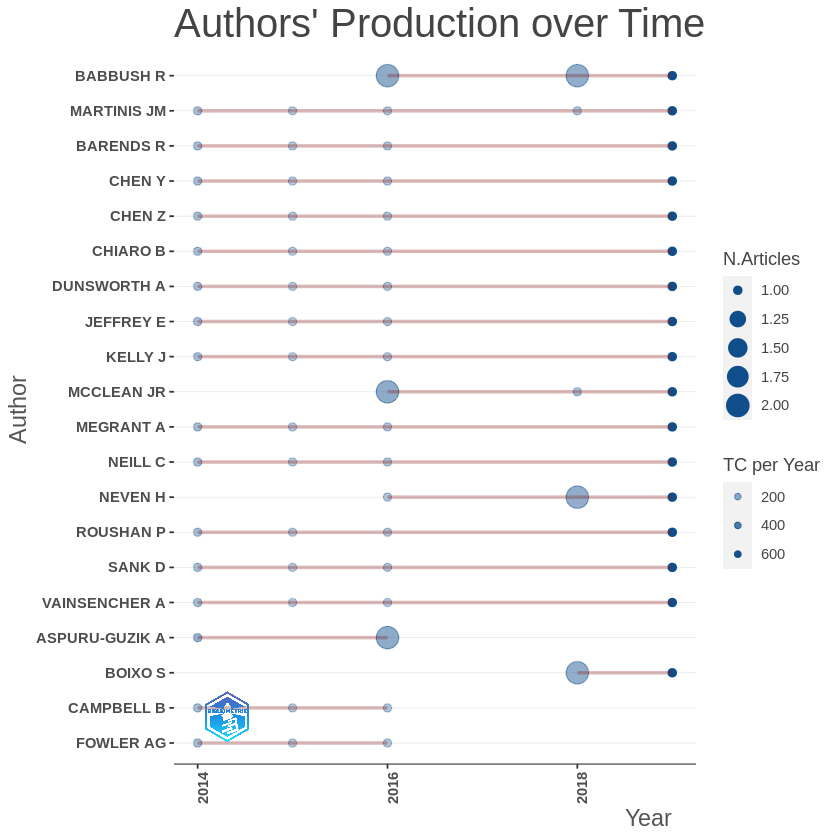

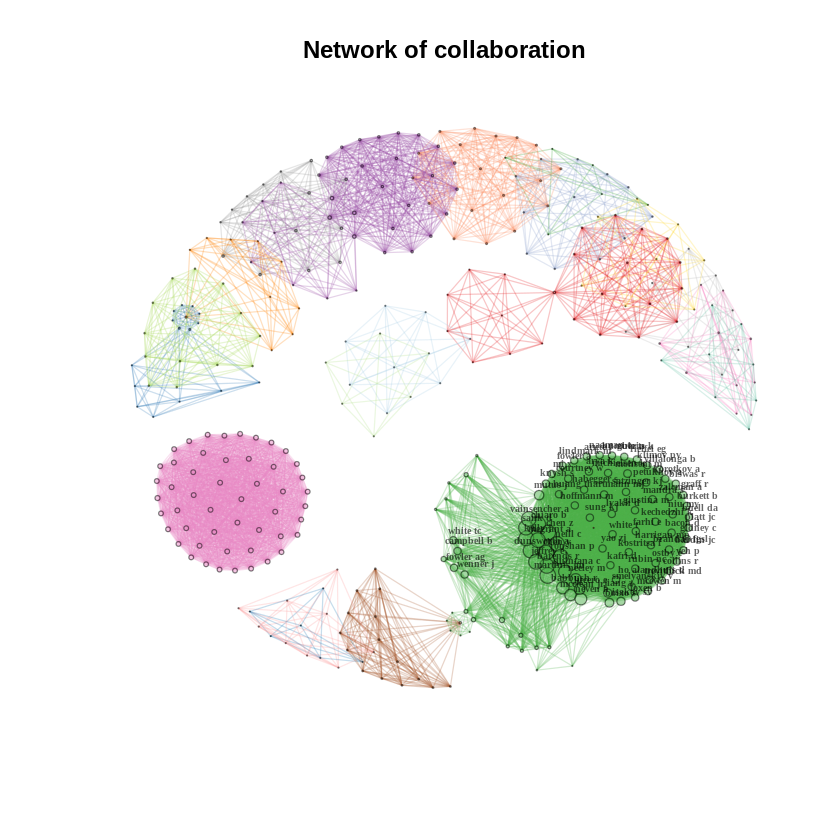

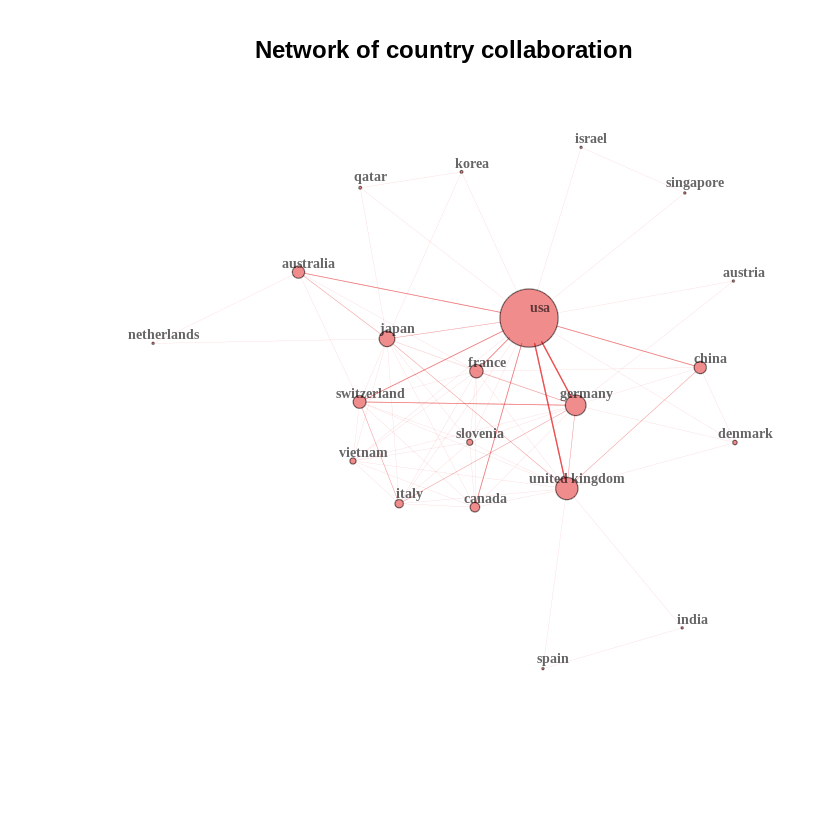

In [ ]:
# 3. Understanding direct links between publications
#------------------------------------------------------
# 3.1 Looking at the evolution of publication over time
top_author <- authorProdOverTime(isi_file, k=20, graph=TRUE)     # use isi_file to look at authors production over time on the top 20 authors, setting graph to TRUE

# In the top 4 authors who published in most years observed? Chen
# in the top 4 authors who had the most concentrated publications within a single year? and who was it? Bengio, Furui

# 3.2 Looking at the network of collaboration between these authors
NetMatrix_collab <- biblioNetwork(isi_file, analysis = "collaboration", network = "authors", sep = ";")         # Build the collaboration network from isi file, find the right arguments for the type of analysis using the helpfile, it should show the network of authors.
net_collab =networkPlot(NetMatrix_collab,  normalize = NULL, weighted=NULL, n = 375, Title = "Network of collaboration",         # Build the network plot on about 1/4 of the total number of authors, and use an appropriate title for the graph
                        type = "kamada", size=5,size.cex=T,remove.multiple=TRUE,labelsize=0.5,label.n=50,label.cex=T)

# 3.3 Look at higher level country collaboration
isi_file_country <- metaTagExtraction(isi_file, Field = "AU_CO", sep = ";")    # extract the country name from the original file (e.g. isi_file)
NetMatrix_country <- biblioNetwork(isi_file_country, analysis = "collaboration", network = "countries", sep = ";")  # use the appropriate file to do the analysis on, the appropriate analyssis and the netowrk argument.
net_country <- networkPlot(NetMatrix_country, n = dim(NetMatrix_country)[1], Title = "Network of country collaboration", type = "kamada",      # Build the netowrk using the appropriate file, define a descriptive title and the layout type should be circle
                           size=TRUE, remove.multiple=FALSE,labelsize=0.7,cluster="none")

In [ ]:
# 4. Working with citations
#------------------------------------------------------

# 4.1. Check the top cited articles
isi_citation_article <- citations(isi_file, field="citations", sep=";")   # Using isi_file, use the correct field, by looking at the helpfile
cbind(isi_citation_article$Cited[1:30])     # Show the top 30 cited articles

# Notice that the articles with most citations are among the Turing award 2019 apart from one, which one?
# Check the article full author list using the doi : www.doi.org/10.XXXX/XXXXXX

# 4.2. Check the top cited authors
      # Use the above code to produce to check the top authors in the cited
isi_citation_author <- citations(isi_file, field="author", sep=";")   # Using isi_file, use the correct field, by looking at the helpfile

cbind(isi_citation_author$Cited[1:30])

## Question ##
# Do you think that the software helps you disambiguate authors (can you see similar author names)?

"ANONYMOUS, PREPRINT",8
"BARENDS R, 2014, NATURE, V508, P500, DOI 10.1038/NATURE13171",8
"ASPURU-GUZIK A, 2005, SCIENCE, V309, P1704, DOI 10.1126/SCIENCE.1113479",7
"FEYNMAN RP, 1982, INT J THEOR PHYS, V21, P467, DOI 10.1007/BF02650179",7
"FOWLER AG, 2012, PHYS REV A, V86, DOI 10.1103/PHYSREVA.86.032324",7
"KITAEV AY, 2003, ANN PHYS-NEW YORK, V303, P2, DOI 10.1016/S0003-4916(02)00018-0",7
"NAYAK C, 2008, REV MOD PHYS, V80, P1083, DOI 10.1103/REVMODPHYS.80.1083",7
"NIELSEN MA., 2002, QUANTUM COMPUTATION",7
"O'BRIEN JL, 2009, NAT PHOTONICS, V3, P687, DOI 10.1038/NPHOTON.2009.229",6
"BROOME MA, 2013, SCIENCE, V339, P794, DOI 10.1126/SCIENCE.1231440",5
"KITAEV AY., 2001, PHYS-USP+, V44, P131, DOI 10.1070/1063-7869/44/10S/S29, DOI 10.1070/1063-7869/44/10S/S29",5


ANONYMOUS,158
BRAVYI S,20
FARHI E,20
BOIXO S,17
BARENDS R,16
KITAEV AY,15
AARONSON S,13
BABBUSH R,13
FOWLER AG,13
BRAUNSTEIN SL,12
NIELSEN MA,12
